## Real Estate - Price Prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")
housing.columns.str.match("Unnamed") # removal of "unnamed" colums

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline 

In [8]:
import matplotlib.pyplot as plt

## Train-Test Spliting

In [9]:
# Train-Test Splitting using numpy array
import numpy as np
#creating function
def train_test_data(data, ratio):
    np.random.seed(42) # fixes the randomly arranged data
    shuffled = np.random.permutation(len(data)) #randomizes data
    test_set_size = int(len(data) * ratio) # size of the test data 
    test_index = shuffled[:test_set_size] # resultant test data
    train_index = shuffled[test_set_size:] # resultant train data
    return data.iloc[train_index], data.iloc[test_index]

In [10]:
train_set, test_set = train_test_data(housing, 0.2)
print(len(train_set))
print(len(test_set))

405
101


In [11]:
#Train-Test Splitting using sklearn module
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state= 42)
print(len(train_set))
print(len(test_set))

404
102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    SSS_train_set = housing.loc[train_index]
    SSS_test_set = housing.loc[test_index]

In [53]:
#Above stratified shuffling is being tested . Worked.
#SSS_test_set['CHAS'].value_counts() 
SSS_train_set['CHAS'].value_counts() 

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = SSS_train_set.copy()

## Finding Co Relations

In [15]:
# Notes on Pearson Co-Realtion Coefficent 
# Pearson co=relation coefficent =  the relationship between the chosen attribute to other attributes
# ranges from 1 to -1 . from [strong,high,medium,small]
# 1 signifies strong positive  co - relation 
# -1 signifies strong negative co-relation 
core_matrix = housing.corr()
core_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='TAX', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='TAX'>,
        <AxesSubplot:xlabel='RM', ylabel='TAX'>,
        <AxesSubplot:xlabel='ZN', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='TAX'>

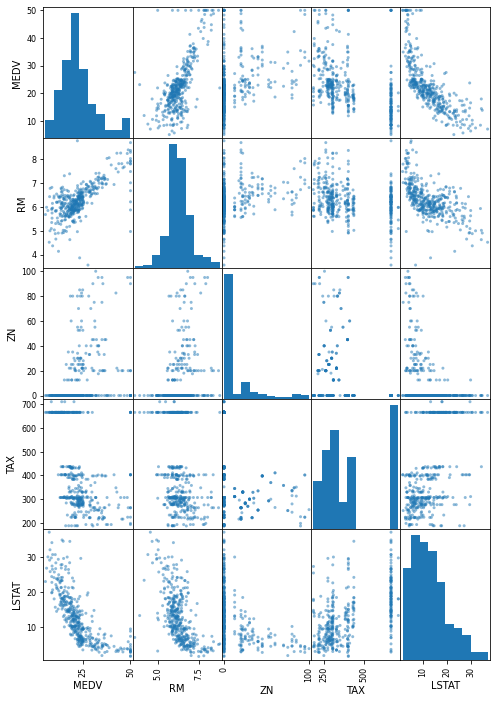

In [16]:
from pandas.plotting import scatter_matrix
attribute = ["MEDV", "RM", "ZN", "TAX","LSTAT"]
scatter_matrix(housing[attribute], figsize = (8,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

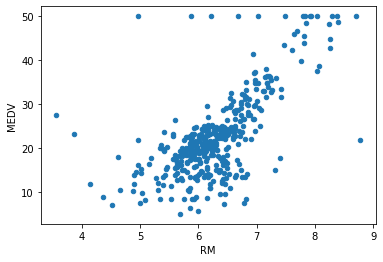

In [17]:
housing.plot(kind = "scatter" , x="RM", y= "MEDV")

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

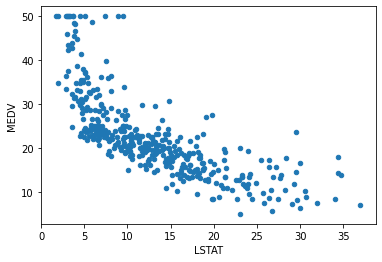

In [18]:
housing.plot(kind = "scatter" , x="LSTAT", y= "MEDV")

## Attribute combination

In [19]:
housing["BAGE"] = housing["B"]/housing["AGE"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BAGE
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,12.277812
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,13.162963
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,4.233013
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,7.309392
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,13.733564


In [20]:
housing["LSTAB"] = housing["LSTAT"]/housing["B"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BAGE,LSTAB
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,12.277812,0.016722
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,13.162963,0.015322
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,4.233013,0.047147
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,7.309392,0.017309
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,13.733564,0.015495


In [21]:
housing["ZNDUS"] = housing["ZN"]/housing["INDUS"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BAGE,LSTAB,ZNDUS
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,12.277812,0.016722,21.978022
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,13.162963,0.015322,39.800995
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,4.233013,0.047147,0.000000
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,7.309392,0.017309,0.000000
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,13.733564,0.015495,0.000000


In [22]:
housing["RMAGE"] = housing["RM"]/housing["AGE"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BAGE,LSTAB,ZNDUS,RMAGE
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,12.277812,0.016722,21.978022,0.190875
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,13.162963,0.015322,39.800995,0.223401
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,4.233013,0.047147,0.000000,0.069274
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,7.309392,0.017309,0.000000,0.117422
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,13.733564,0.015495,0.000000,0.218408


In [23]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BAGE,LSTAB,ZNDUS,RMAGE,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,12.277812,0.016722,21.978022,0.190875,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,13.162963,0.015322,39.800995,0.223401,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,4.233013,0.047147,0.000000,0.069274,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,7.309392,0.017309,0.000000,0.117422,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,13.733564,0.015495,0.000000,0.218408,45.468948


In [24]:
core_matrix = housing.corr()
core_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
ZNDUS      0.281156
DIS        0.240451
RMAGE      0.238643
BAGE       0.227088
CHAS       0.205066
LSTAB     -0.090599
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

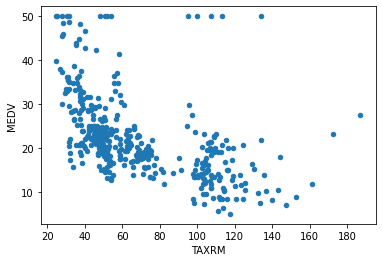

In [25]:
housing.plot(kind = "scatter" , x="TAXRM", y= "MEDV")

In [26]:
housing = SSS_train_set.drop("MEDV", axis = 1)
housing_label = SSS_train_set["MEDV"].copy()

In [27]:
#In case of missing attributes or na , finding out the median of that specific column and filling it in the place of na is the solution
# median = housing["RM"].median() #finding the median of RM
# housing["RM"].fillna(median) # filling the NA with median value
#same median will be used in train and test data
# in case of more than one attribute , imputer is used .
# Code for imputer : 

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating  a Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std_scaler",StandardScaler())
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr.shape

(404, 13)

## Model


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model = RandomForestRegressor()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor()

In [35]:
Temp_Data = housing.iloc[:5]
Temp_Label = housing_label.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(Temp_Data)

In [37]:
model.predict(prepared_data)

array([22.508, 25.587, 16.363, 23.376, 23.391])

In [38]:
list(Temp_Label)

[21.9, 24.5, 16.7, 23.1, 23.0]

Evaluating the model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label,housing_predictions)
rmse = np.sqrt(mse)

In [40]:
mse
# Linear regression mse = 23.32234607923367
# Linear regression rmse = 4.829321492635759

1.3529252128712854

In [41]:
rmse
# Decisiontree regression mse = 0
# Decisiontree regression rmse = 0
# overfitting lol ._. '-' ;-;

1.1631531338870584

Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label , scoring="neg_mean_squared_error" ,cv=10)
rmse_scores = np.sqrt(-scores)

In [43]:
rmse_scores
#  Decision tree : array([4.10849803, 5.65969921, 5.65760873, 3.53418842, 4.04471878,
#                   2.84644515, 5.12640225, 4.96593395, 3.45010869, 3.7694164 ])
#  Linear Regression :array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
#       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])


array([2.79289168, 2.69441597, 4.40018895, 2.56972379, 3.33073436,
       2.62687167, 4.77007351, 3.27403209, 3.38378214, 3.16691711])

In [44]:
def print_scores(scores):
    print("Scores : ",scores)
    print("mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [45]:
print_scores(rmse_scores)
# Decision tree 
# Scores :  [4.16852316 5.61066058 5.38074707 3.76087042 4.19386457 2.91847563
# 5.16522023 3.39186527 3.28131071 4.20071422]
#mean:  4.207225187158817
#Standard deviation:  0.8745567547159991

# Linear Regresion: 
#Scores :  [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
# 7.47384779 5.48226252 4.14885722 6.0669122 ]
#mean:  5.030437102767305
#Standard deviation:  1.060766115829483

#Random Forest Regression:
# I CHOOSE YOU ! PIKA-cough.
#Scores :  [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
# 4.77007351 3.27403209 3.38378214 3.16691711]
#mean:  3.3009631251857217
#Standard deviation:  0.7076841067486248

Scores :  [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
 4.77007351 3.27403209 3.38378214 3.16691711]
mean:  3.3009631251857217
Standard deviation:  0.7076841067486248


In [46]:
from joblib import dump, load
dump(model, 'house_price_prediction.joblib') 

['house_price_prediction.joblib']

Model Testing

In [47]:
x_test = SSS_test_set.drop("MEDV", axis = 1)
y_test = SSS_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [48]:
final_mse
# 8.69568135294117

8.69568135294117

In [49]:
final_rmse
#2.948844070638726 ~_~

2.948844070638726

In [54]:
print(final_prediction , list(y_test))

[24.895 11.466 25.439 21.974 18.471 14.873 19.897 14.416 31.435 40.68
 20.067 11.776 24.004 28.999 19.503 10.679 31.58  14.492 23.586 18.94
 19.767 17.955 17.534 22.073 18.429 30.549 16.416 32.69   8.952 33.616
 23.715 21.26  22.98  10.808 20.924 11.293 42.541 24.308 23.292 41.623
 23.753 29.423 20.594 20.912 19.565 33.578 44.468 19.92  20.344 21.768
 21.492 14.514 21.169 15.094 24.771 32.651 42.389 28.135 19.353 20.837
 47.322  9.96  18.674 24.579 15.057 32.746 19.461 18.158 19.014 33.84
 27.27  22.85  21.519 22.436 34.997 12.793 15.94  20.048 20.726 21.379
 22.303 21.651 14.429 22.832 20.848 21.168 13.933 21.346 22.005 23.151
 18.865 27.24   7.276 26.14  18.817 29.887 19.692 31.073 14.663 26.607
 20.713 20.087] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

In [51]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])